In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.layers import merge, Input
import cv2


In [17]:
!gdown --id 1qLlNoNsb9ElbqIcsgMWTItMQOIXszu6J

Downloading...
From: https://drive.google.com/uc?id=1qLlNoNsb9ElbqIcsgMWTItMQOIXszu6J
To: /content/data.zip
100% 3.14M/3.14M [00:00<00:00, 46.3MB/s]


In [18]:
!unzip '/content/data.zip'

Archive:  /content/data.zip
   creating: data/
  inflating: data/car1.jpg           
  inflating: data/car2.jpg           
  inflating: data/car3.jpg           
  inflating: data/car4.jpg           
  inflating: data/cat1.jpg           
  inflating: data/cat2.jpg           
  inflating: data/cat3.jpg           
  inflating: data/cat4.jpg           
  inflating: data/dog1.jpg           
  inflating: data/dog2.jpg           
  inflating: data/dog3.jpg           
  inflating: data/dog4.jpg           
  inflating: data/people1.jpg        
  inflating: data/people2.jpg        
  inflating: data/people3.jpg        
  inflating: data/people4.jpg        
  inflating: data/tree1.jpg          
  inflating: data/tree2.jpg          
  inflating: data/tree3.jpg          
  inflating: data/tree4.jpg          


##Bước 2: Load tất cả ảnh trong dataset

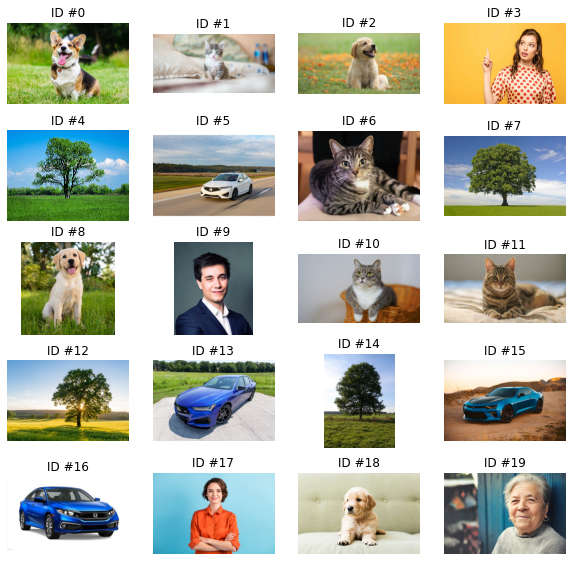

In [23]:
image_dir = os.listdir('/content/data')
i = 0
fig = plt.figure(figsize=(10, 10))
for filename in image_dir:
    img = cv2.imread(os.path.join('/content/data/' + filename))

    i += 1
    fig.add_subplot(5, 4, i)
    plt.title('ID #{}'.format(i-1))
    plt.imshow(img[:,:,::-1])
    plt.axis('off')

##Bước 3: Rút trích đặc trưng VGG16 (pretrained) cho tất cả ảnh trên

In [26]:
image_input = Input(shape=(224,224,3))
model = VGG16(input_tensor=image_input)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [31]:
data_dir = os.listdir("/content/data")
vgg16_feature_list=[]

for i in data_dir:
    img_path ="/content/data" +"/"+i
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    vgg16_feature = model.predict(img_data)
    vgg16_feature_np = np.array(vgg16_feature)
    vgg16_feature_list.append(vgg16_feature_np.flatten())


vgg16_feature_list_np = np.array(vgg16_feature_list)
print(vgg16_feature_list_np.shape)

(20, 1000)


##Bước 4: Load ảnh truy vấn thuộc trong các chủ đề

In [43]:
img_path = '/content/data/car4.jpg'
img_feature = []

img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

##Bước 5: Rút trích đặc trưng VGG16

In [44]:
vgg16_feature = model.predict(img_data)
vgg16_feature_np = np.array(vgg16_feature)
img_feature.append(vgg16_feature_np.flatten())

img_feature = np.array(img_feature)

##Bước 6: Dùng KNN lấy top K=3

In [45]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=3)
knn.fit(vgg16_feature_list_np)

NearestNeighbors(n_neighbors=3)

##Bước 7


In [46]:
knn.kneighbors(img_feature, return_distance=False)


array([[13, 15,  5]])